<a href="https://colab.research.google.com/github/tanvibattu/deep-learning-practice/blob/master/CNN_practice/CNN-mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.datasets import mnist
from keras.optimizers import RMSprop, adam

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [17]:
x_train.shape

(60000, 28, 28)

In [18]:
#Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [0]:
#convert 0-9 labels into "one-hot" format 
train_labels = keras.utils.to_categorical(x_train, 10)
test_labels = keras.utils.to_categorical(y_train, 10)

2


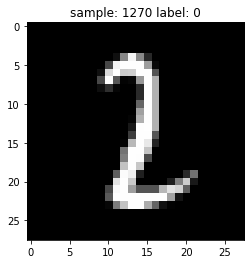

In [20]:
import matplotlib.pyplot as plt
def display_sample(num):
  print(y_train[num])
  label = y_train[num].argmax(axis=0)
  image = x_train[num].reshape([28,28])
  plt.title('sample: %d label: %d' %(num,label))
  plt.imshow(image, cmap=plt.get_cmap('gray'))
  plt.show()
display_sample(1270)

In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [22]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)              

In [25]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history = model.fit(x=x_train,y=y_train, batch_size =32, epochs=10,verbose = 2, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 12s - loss: 0.1047 - acc: 0.9688 - val_loss: 0.0405 - val_acc: 0.9873
Epoch 2/10
 - 12s - loss: 0.0652 - acc: 0.9800 - val_loss: 0.0334 - val_acc: 0.9894
Epoch 3/10
 - 12s - loss: 0.0513 - acc: 0.9844 - val_loss: 0.0374 - val_acc: 0.9884
Epoch 4/10
 - 12s - loss: 0.0435 - acc: 0.9865 - val_loss: 0.0409 - val_acc: 0.9875
Epoch 5/10
 - 12s - loss: 0.0375 - acc: 0.9887 - val_loss: 0.0330 - val_acc: 0.9900
Epoch 6/10
 - 12s - loss: 0.0328 - acc: 0.9898 - val_loss: 0.0323 - val_acc: 0.9911
Epoch 7/10
 - 12s - loss: 0.0281 - acc: 0.9916 - val_loss: 0.0281 - val_acc: 0.9920
Epoch 8/10
 - 12s - loss: 0.0249 - acc: 0.9918 - val_loss: 0.0322 - val_acc: 0.9914
Epoch 9/10
 - 12s - loss: 0.0249 - acc: 0.9923 - val_loss: 0.0384 - val_acc: 0.9907
Epoch 10/10
 - 12s - loss: 0.0220 - acc: 0.9923 - val_loss: 0.0313 - val_acc: 0.9918


In [26]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Loss: %.2f"%(score[0]*100))
print("Accuracy: %.2f"%(score[1]*100))
print("Training loss: %.2f"%(history.history['loss'][9]*100))
print("Validation loss: %.2f"%(history.history['val_loss'][9]*100))

Loss: 3.13
Accuracy: 99.18
Training loss: 2.20
Validation loss: 3.13


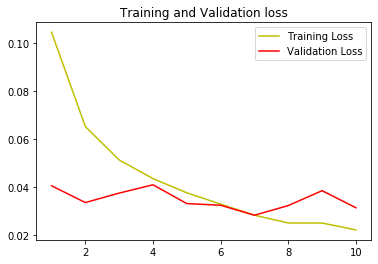

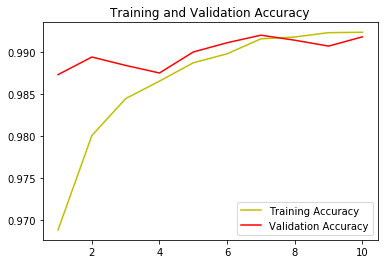

In [27]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)
plt.title("Training and Validation loss")
plt.plot(epochs,loss,'y',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.legend()
plt.show()

acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,len(loss)+1)
plt.title("Training and Validation Accuracy")
plt.plot(epochs,acc,'y',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.legend()
plt.show()